## Brier Score

- The Brier Score measures the fit of the probability estimates of the observed data. Or the accuracy of the predicted probabilities. 
- It is given by the average squared difference of the true label and the predicted probability. The lower the brier score, the better is the calibration.
- It is given by:

**Brier Score = mean( (y -pred)^2 )**

- It works out generally well for balanced datasets, but for imbalanced datasets, but for imbalanced datasets, it is still hard to determine the brier score is due to the observations from the majority class, as brier score is an average value score.

In [37]:
# import libraries

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

# models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# for preparation
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# evaluation
from sklearn.metrics import(
    roc_auc_score,
    brier_score_loss,
    roc_curve,
    plot_roc_curve, # this function will get deprecated
    RocCurveDisplay
)

# to get the calibrated points
from sklearn.calibration import calibration_curve

In [10]:
# define a function to prepare toy dataset

def create_data(weights):
    
    X, y = make_classification(n_samples=10000,
                               n_features=20,
                               n_classes=2,
                               n_redundant=10,
                               class_sep=1,
                               n_clusters_per_class=1,
                               weights=[weights],  # to balance or not to balance
                               random_state=1)  
    
    X = pd.DataFrame(X)
    y = pd.Series(y)
    
    return X,y

In [11]:
# create a balance dataset

X,y  = create_data(0.5)

X.shape, y.shape

((10000, 20), (10000,))

In [12]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.367744,0.169118,0.490309,-0.099269,-0.321689,2.028729,-1.217080,1.052782,-0.219787,-0.532625,-0.284029,0.748649,-1.609348,-0.604958,-0.562323,0.781532,0.972701,1.099992,0.386859,0.932917
1,-0.992571,1.453483,1.240380,-0.258057,-0.354514,-0.936577,0.813220,1.180121,0.123450,-1.598957,-1.581506,1.981644,0.457818,0.116732,-1.117829,-0.350214,1.469932,1.829999,-0.422171,-0.895785
2,0.777302,1.651992,1.284101,-1.147468,-0.541526,-0.648523,-0.506134,1.008741,-0.006846,-1.691435,-1.761168,2.064089,-0.597753,0.357367,-1.113473,-0.696747,1.379473,1.757694,-0.638204,-0.524468
3,0.503518,-0.010875,0.213944,0.064097,0.823696,-0.104237,-0.844305,0.581817,0.907700,-0.211645,-0.052696,0.319429,-1.281878,-0.399945,-0.270524,0.533142,0.506226,0.558628,0.284446,-2.104917
4,0.030649,-0.176175,-0.067561,-0.116144,-1.406837,-0.660697,-0.093624,0.076004,-0.876487,0.110881,0.167762,-0.116232,-0.303181,-0.162147,0.032064,0.239197,0.013647,-0.009563,0.155488,0.685216


In [13]:
y.value_counts()

1    5002
0    4998
dtype: int64

In [14]:
# split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((7000, 20), (3000, 20))

In [15]:
y_train.value_counts()

0    3527
1    3473
dtype: int64

In [16]:
y_train.value_counts()/len(y_train)

0    0.503857
1    0.496143
dtype: float64

In [17]:
# lets initialize all the models objects

logit = LogisticRegression(penalty='l2',
                         solver='newton-cg',
                         max_iter=100,
                         C=1,
                         n_jobs=2,
                         random_state=0)
logit.fit(X_train, y_train)


nb = GaussianNB().fit(X_train,y_train)

rf = RandomForestClassifier(n_estimators=10,
                            random_state=0,
                            n_jobs=2).fit(X_train,y_train)

gm = GradientBoostingClassifier(n_estimators=10,
                               random_state=0).fit(X_train,y_train)

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curv

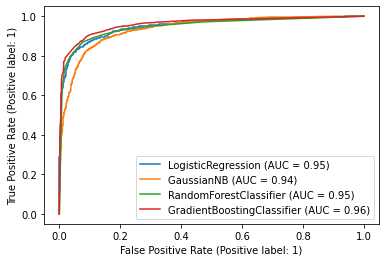

In [34]:
# lets create ROC-AUC curve for all models
ax=plt.gca()

for model in [logit,nb,rf,gm]:
    
    #score = model.predict_proba(X_test)[:,1]
    #label = type(model).__name__
    plot_roc_curve(model,X_test,y_test,ax=ax);


In [43]:
# lets create ROC-AUC curve for all models
"""
ax=plt.gca()
from sklearn import metrics
for model in [logit,nb,rf,gm]:
    
    score = model.predict_proba(X_test)[:,1]
    #roc_auc = roc_auc_score(y_test, score)
    fpr,tpr,thresholds = roc_curve(y_test, score)
    #label = type(model).__name__
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    display.plot();
    #plt.show()
"""

'\nax=plt.gca()\nfrom sklearn import metrics\nfor model in [logit,nb,rf,gm]:\n    \n    score = model.predict_proba(X_test)[:,1]\n    #roc_auc = roc_auc_score(y_test, score)\n    fpr,tpr,thresholds = roc_curve(y_test, score)\n    #label = type(model).__name__\n    roc_auc = metrics.auc(fpr, tpr)\n    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)\n    display.plot();\n    #plt.show()\n'

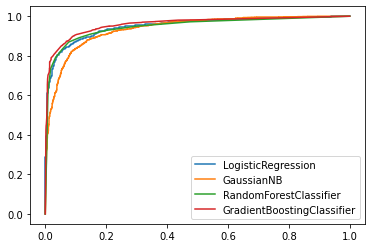

In [47]:
for model in [logit,nb,rf,gm]:
    
    score = model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, score)
    fpr,tpr,thresholds = roc_curve(y_test, score)
    label = type(model).__name__
    plt.plot(fpr, tpr, label=label)
    plt.legend(loc='lower right')

In [49]:
# get the ROC scores for all models

for model in [logit,nb,rf,gm]:
    
    score = model.predict_proba(X_test)[:,1]
    roc = roc_auc_score(y_test,score)
    model_name = type(model).__name__
    print('ROC score for {} : {}'.format(model_name,roc))

ROC score for LogisticRegression : 0.9504988308963483
ROC score for GaussianNB : 0.9369099739058022
ROC score for RandomForestClassifier : 0.9476179763191486
ROC score for GradientBoostingClassifier : 0.960202457896485


- We can see all the models performed comparatively well with this balanced dataset
- Lets check how the brier score turns out and the calibration curve

## Brier Score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html

In [50]:
# get the Brier scores for all models

for model in [logit,nb,rf,gm]:
    score = model.predict_proba(X_test)[:,1]
    bs = brier_score_loss(y_test,score)
    model_name = type(model).__name__
    print('Brier score for {} : {}'.format(model_name,bs))

Brier score for LogisticRegression : 0.08377581814025406
Brier score for GaussianNB : 0.12107014478789326
Brier score for RandomForestClassifier : 0.08203
Brier score for GradientBoostingClassifier : 0.0955528705367653


From the Brier Score, we see that even though Gradient Boosting Machines show the highest performance, its Brier Score is bigger, suggesting that its probabilities are not as well calibrated as those from Random Forest and Logistic Regression.

In [58]:
# lets write a function to plot the calibration curve

def plot_calibration_curve(bins):
    plt.figure(figsize=(10,8))

    for model in [logit,nb,rf,gm]:
        score = model.predict_proba(X_test)[:,1]
        label = type(model).__name__
        fraction_of_positives, mean_predicted_value = calibration_curve(y_test, score, n_bins=bins,strategy='uniform')
        plt.plot(mean_predicted_value, fraction_of_positives,label=label)
        
    # draw the perfect calibrated line
    plt.plot(np.linspace(0,1,10),np.linspace(0,1,10),linestyle='--',c='red',label='Perfect Calibration')
    plt.legend(loc='best');
    plt.title('Calibration Curve')
    plt.xlabel('Probability Predictions')
    plt.ylabel('Fraction of positive examples')
    
    plt.show()

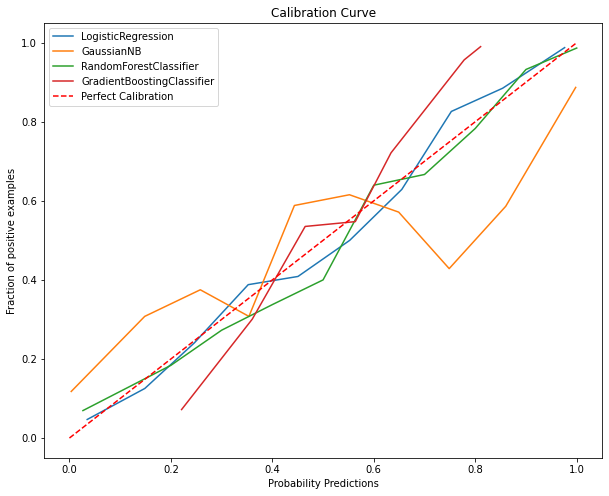

In [60]:
plot_calibration_curve(bins=10)

As expected, Naive Bayes and Gradient Boosting Machines show the worse calibration.

## Imbalanced Dataset

In [61]:
X, y = create_data(0.9)

In [62]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.367744,0.169118,0.490309,-0.099269,-0.321689,2.028729,-1.217080,1.052782,-0.219787,-0.532625,-0.284029,0.748649,-1.609348,-0.604958,-0.562323,0.781532,0.972701,1.099992,0.386859,0.932917
1,-0.992571,1.453483,1.240380,-0.258057,-0.354514,-0.936577,0.813220,1.180121,0.123450,-1.598957,-1.581506,1.981644,0.457818,0.116732,-1.117829,-0.350214,1.469932,1.829999,-0.422171,-0.895785
2,0.777302,1.651992,1.284101,-1.147468,-0.541526,-0.648523,-0.506134,1.008741,-0.006846,-1.691435,-1.761168,2.064089,-0.597753,0.357367,-1.113473,-0.696747,1.379473,1.757694,-0.638204,-0.524468
3,0.503518,-0.010875,0.213944,0.064097,0.823696,-0.104237,-0.844305,0.581817,0.907700,-0.211645,-0.052696,0.319429,-1.281878,-0.399945,-0.270524,0.533142,0.506226,0.558628,0.284446,-2.104917
4,0.030649,-0.176175,-0.067561,-0.116144,-1.406837,-0.660697,-0.093624,0.076004,-0.876487,0.110881,0.167762,-0.116232,-0.303181,-0.162147,0.032064,0.239197,0.013647,-0.009563,0.155488,0.685216


In [63]:
# split data
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((7000, 20), (3000, 20))

In [64]:
y_train.value_counts()

0    6263
1     737
dtype: int64

In [65]:
y_train.value_counts()/len(y_train)

0    0.894714
1    0.105286
dtype: float64

In [66]:
# lets initialize all the models objects

logit = LogisticRegression(penalty='l2',
                         solver='newton-cg',
                         max_iter=100,
                         C=1,
                         n_jobs=2,
                         random_state=0)
logit.fit(X_train, y_train)


nb = GaussianNB().fit(X_train,y_train)

rf = RandomForestClassifier(n_estimators=10,
                            random_state=0,
                            n_jobs=2).fit(X_train,y_train)

gm = GradientBoostingClassifier(n_estimators=10,
                               random_state=0).fit(X_train,y_train)

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curv

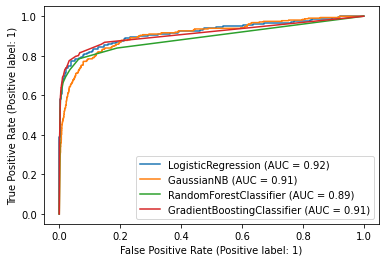

In [67]:
# lets create ROC-AUC curve for all models
ax=plt.gca()

for model in [logit,nb,rf,gm]:
    
    #score = model.predict_proba(X_test)[:,1]
    #label = type(model).__name__
    plot_roc_curve(model,X_test,y_test,ax=ax);


In [68]:
# get the ROC scores for all models

for model in [logit,nb,rf,gm]:
    
    score = model.predict_proba(X_test)[:,1]
    roc = roc_auc_score(y_test,score)
    model_name = type(model).__name__
    print('ROC score for {} : {}'.format(model_name,roc))

ROC score for LogisticRegression : 0.9192685694606704
ROC score for GaussianNB : 0.9085849339753839
ROC score for RandomForestClassifier : 0.8917101828456772
ROC score for GradientBoostingClassifier : 0.9133225873183471


## Brier Scores

In [69]:
# get the Brier scores for all models

for model in [logit,nb,rf,gm]:
    score = model.predict_proba(X_test)[:,1]
    bs = brier_score_loss(y_test,score)
    model_name = type(model).__name__
    print('Brier score for {} : {}'.format(model_name,bs))

Brier score for LogisticRegression : 0.0383281176788733
Brier score for GaussianNB : 0.11156648168896698
Brier score for RandomForestClassifier : 0.03984666666666667
Brier score for GradientBoostingClassifier : 0.041962591579426944


- Here we can see that the Brier scores for almost all the models are relatively low, but we are not sure and also it is not certain that this low value of brier score is either due to actual result of the model or due to the observations from the majority class.
- we can maybe get a better idea after seeing the plots of the calibration curve

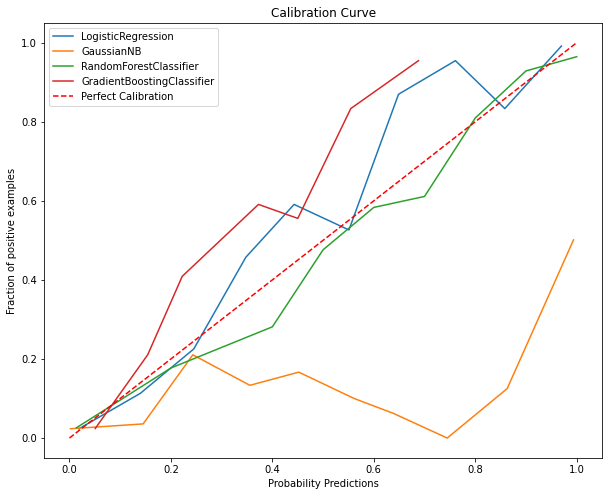

In [70]:
plot_calibration_curve(bins=10)

- Here, we can see the calibration curves for all the models show much deviation from the perfect line.
- So, the low brier values of the models might probably due to majority class observations
- We see that the models return not so well calibrated probabilities, apart from Random Forests. Remember however, that there are very few observations of the minority class (towards the right of the plot), to determine accurately the fraction of positives. So this calibration curve could be inaccurate.

In [72]:
# lets try increasing the number of observations and check

X, y = make_classification(n_samples=100000,
                           n_features=20,
                           n_classes=2,
                           n_redundant=10,
                           class_sep=1,
                           n_clusters_per_class=1,
                           weights=[0.7],  # to balance or not to balance
                           random_state=1)  

X = pd.DataFrame(X)
y = pd.Series(y)


In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((70000, 20), (30000, 20))

In [74]:
y_train.value_counts()

0    48833
1    21167
dtype: int64

In [75]:
y_train.value_counts()/len(y_train)

0    0.697614
1    0.302386
dtype: float64

In [76]:
# lets initialize all the models objects

logit = LogisticRegression(penalty='l2',
                         solver='newton-cg',
                         max_iter=100,
                         C=1,
                         n_jobs=2,
                         random_state=0)
logit.fit(X_train, y_train)


nb = GaussianNB().fit(X_train,y_train)

rf = RandomForestClassifier(n_estimators=10,
                            random_state=0,
                            n_jobs=2).fit(X_train,y_train)

gm = GradientBoostingClassifier(n_estimators=10,
                               random_state=0).fit(X_train,y_train)

C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\budha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curv

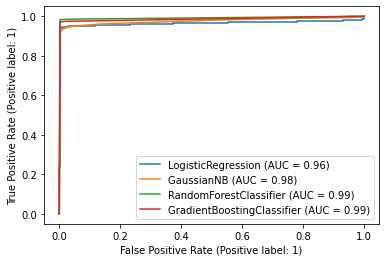

In [77]:
# lets create ROC-AUC curve for all models
ax=plt.gca()

for model in [logit,nb,rf,gm]:
    
    #score = model.predict_proba(X_test)[:,1]
    #label = type(model).__name__
    plot_roc_curve(model,X_test,y_test,ax=ax);

In [78]:
# get the ROC scores for all models

for model in [logit,nb,rf,gm]:
    
    score = model.predict_proba(X_test)[:,1]
    roc = roc_auc_score(y_test,score)
    model_name = type(model).__name__
    print('ROC score for {} : {}'.format(model_name,roc))

ROC score for LogisticRegression : 0.9648588327351847
ROC score for GaussianNB : 0.975355396709577
ROC score for RandomForestClassifier : 0.9911902535335894
ROC score for GradientBoostingClassifier : 0.9857239306785878


- We can see a very good ROC score for all the models
- Lets check the Brier scores as well

In [79]:
# get the Brier scores for all models

for model in [logit,nb,rf,gm]:
    score = model.predict_proba(X_test)[:,1]
    bs = brier_score_loss(y_test,score)
    model_name = type(model).__name__
    print('Brier score for {} : {}'.format(model_name,bs))

Brier score for LogisticRegression : 0.024775219440309793
Brier score for GaussianNB : 0.027631381442761352
Brier score for RandomForestClassifier : 0.007659
Brier score for GradientBoostingClassifier : 0.035210160195367726


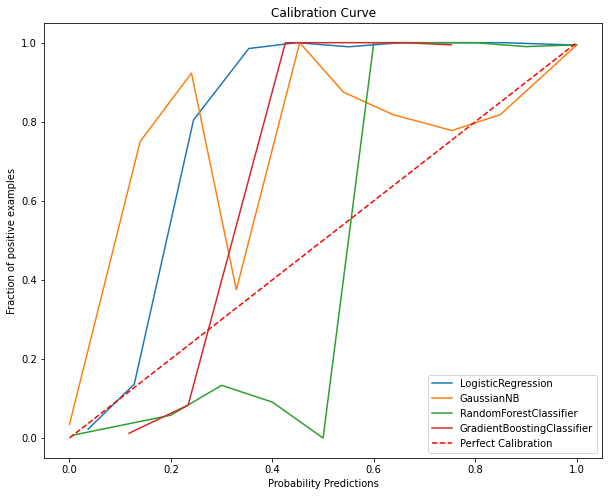

In [80]:
# calibration plot
plot_calibration_curve(bins=10)

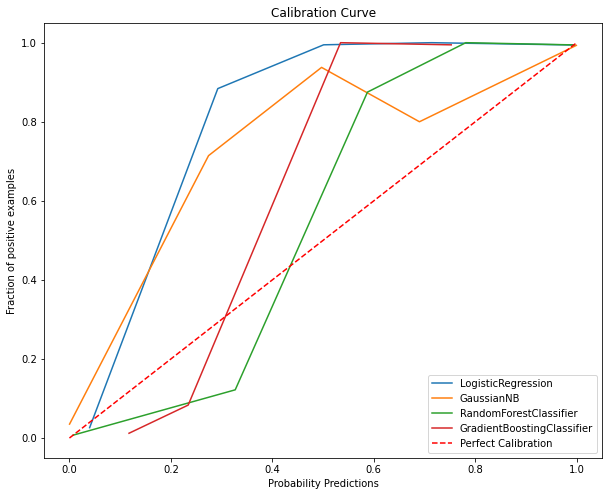

In [81]:
plot_calibration_curve(bins=5)

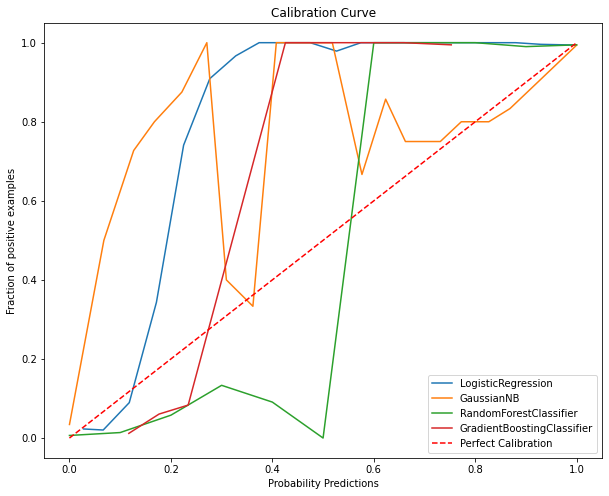

In [82]:
plot_calibration_curve(bins=20)

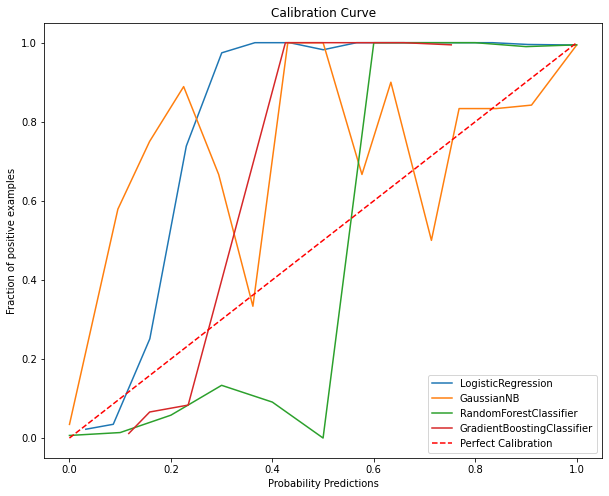

In [85]:
plot_calibration_curve(bins=15)

- The calibration curve are not quite good and accurate for this larger dataset, even though we have improve the class imbalancy
- bins = 5 kind of produces the best calibration curve, and this is because we have generalized the probability predictions into a larger group.